In [1]:
cd /content/drive/My Drive/bigcon

/content/drive/My Drive/bigcon


In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.3.0'

In [4]:
import pandas as pd
import numpy as np

## Data load

In [5]:
import joblib
data = joblib.load('Snd_FE.pkl')

In [6]:
locals().update(data)

In [7]:
X = data['X']
y =data['y']

In [8]:
X.head()

,노출(분),판매단가,방송시간차,상품방송횟수,브랜드방송횟수,조기매진,isHoliday,방송월,방송일,방송시간(분),평일여부,상품군_최고판매단가,상품군_최저판매단가,상품군_평균판매단가,상품군_중간판매단가,상품군_최고-최저,상품군_표준편차,상품군_분산,마더코드_최고판매단가,마더코드_최저판매단가,마더코드_평균판매단가,마더코드_최고-최저,마더코드_분산,마더코드_표준편차,상품군&브랜드_최고판매단가,상품군&브랜드_최저판매단가,상품군&브랜드_평균판매단가,상품군&브랜드_중간판매단가,상품군&브랜드_최고-최저,상품군&브랜드_표준편차,상품군&브랜드_분산,NEW_최고판매단가,NEW_최저판매단가,NEW_평균판매단가,NEW_중간판매단가,NEW_최고-최저,NEW_분산,NEW_표준편차,상품군평균판매단가차이,결합상품,...,방송시간(시간)_17,방송시간(시간)_18,방송시간(시간)_19,방송시간(시간)_2,방송시간(시간)_20,방송시간(시간)_21,방송시간(시간)_22,방송시간(시간)_23,방송시간(시간)_24,방송시간(시간)_6,방송시간(시간)_7,방송시간(시간)_8,방송시간(시간)_9,방송시간대_0,방송시간대_1,방송시간대_2,방송시간대_23,방송시간대_아침,방송시간대_오전,방송시간대_오후,방송시간대_저녁,계절_가을,계절_겨울,계절_봄,계절_여름,분기_1분기,분기_2분기,분기_3분기,분기_4분기,성별_0,성별_1,성별_2,상품군_가격대_0.0,상품군_가격대_1.0,상품군_가격대_2.0,전체_가격대_0.0,전체_가격대_1.0,전체_가격대_2.0,전체_가격대_3.0,전체_가격대_4.0
0,20.0,39900,0.0,2.0,21.0,0,1,1,1,0,0,2490000.0,29000.0,116562.983425,59900.0,2461000.0,263711.564418,6.954379e+10,69900.0,39900.0,58266.666667,30000.0,1.520024e+08,12328.924566,69900.0,39900.0,58266.666667,59900.0,30000.0,12328.924566,1.520024e+08,39900.0,39900.0,39900.0,39900.0,0.0,0.0,0.0,76662.983425,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
1,20.0,39900,0.0,2.0,21.0,0,1,1,1,0,0,2490000.0,29000.0,116562.983425,59900.0,2461000.0,263711.564418,6.954379e+10,69900.0,39900.0,58266.666667,30000.0,1.520024e+08,12328.924566,69900.0,39900.0,58266.666667,59900.0,30000.0,12328.924566,1.520024e+08,39900.0,39900.0,39900.0,39900.0,0.0,0.0,0.0,76662.983425,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0
2,20.0,39900,0.0,2.0,21.0,0,1,1,1,20,0,2490000.0,29000.0,116562.983425,59900.0,2461000.0,263711.564418,6.954379e+10,69900.0,39900.0,58266.666667,30000.0,1.520024e+08,12328.924566,69900.0,39900.0,58266.666667,59900.0,30000.0,12328.924566,1.520024e+08,39900.0,39900.0,39900.0,39900.0,0.0,0.0,0.0,76662.983425,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
3,20.0,39900,0.0,2.0,21.0,0,1,1,1,20,0,2490000.0,29000.0,116562.983425,59900.0,2461000.0,263711.564418,6.954379e+10,69900.0,39900.0,58266.666667,30000.0,1.520024e+08,12328.924566,69900.0,39900.0,58266.666667,59900.0,30000.0,12328.924566,1.520024e+08,39900.0,39900.0,39900.0,39900.0,0.0,0.0,0.0,76662.983425,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0
4,20.0,39900,0.0,2.0,21.0,0,1,1,1,40,0,2490000.0,29000.0,116562.983425,59900.0,2461000.0,263711.564418,6.954379e+10,69900.0,39900.0,58266.666667,30000.0,1.520024e+08,12328.924566,69900.0,39900.0,58266.666667,59900.0,30000.0,12328.924566,1.520024e+08,39900.0,39900.0,39900.0,39900.0,0.0,0.0,0.0,76662.983425,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35379 entries, 0 to 38303
Columns: 481 entries, 노출(분) to 전체_가격대_4.0
dtypes: float64(404), int64(15), uint8(62)
memory usage: 115.5 MB


In [10]:
#X.to_excel("get_column.xlsx")

In [11]:
column_list =[]
for col in X.columns:
  column_list.append(col)

In [12]:
column_list

['노출(분)',
 '판매단가',
 '방송시간차',
 '상품방송횟수',
 '브랜드방송횟수',
 '조기매진',
 'isHoliday',
 '방송월',
 '방송일',
 '방송시간(분)',
 '평일여부',
 '상품군_최고판매단가',
 '상품군_최저판매단가',
 '상품군_평균판매단가',
 '상품군_중간판매단가',
 '상품군_최고-최저',
 '상품군_표준편차',
 '상품군_분산',
 '마더코드_최고판매단가',
 '마더코드_최저판매단가',
 '마더코드_평균판매단가',
 '마더코드_최고-최저',
 '마더코드_분산',
 '마더코드_표준편차',
 '상품군&브랜드_최고판매단가',
 '상품군&브랜드_최저판매단가',
 '상품군&브랜드_평균판매단가',
 '상품군&브랜드_중간판매단가',
 '상품군&브랜드_최고-최저',
 '상품군&브랜드_표준편차',
 '상품군&브랜드_분산',
 'NEW_최고판매단가',
 'NEW_최저판매단가',
 'NEW_평균판매단가',
 'NEW_중간판매단가',
 'NEW_최고-최저',
 'NEW_분산',
 'NEW_표준편차',
 '상품군평균판매단가차이',
 '결합상품',
 'log최근3개월상품군추세',
 'v0',
 'v1',
 'v2',
 'v3',
 'v4',
 'v5',
 'v6',
 'v7',
 'v8',
 'v9',
 'v10',
 'v11',
 'v12',
 'v13',
 'v14',
 'v15',
 'v16',
 'v17',
 'v18',
 'v19',
 'v20',
 'v21',
 'v22',
 'v23',
 'v24',
 'v25',
 'v26',
 'v27',
 'v28',
 'v29',
 '경상지수',
 '불변지수',
 '현재생활형편CSI',
 '현재경기판단CSI',
 '생활형편전망CSI',
 '소비지출전망CSI',
 '주택가격전망CSI',
 '임금수준전망CSI',
 '소비자심리지수',
 '합계',
 '컴퓨터 및 주변기기',
 '가전·전자·통신기기',
 '서적',
 '사무·문구',
 '의복',
 '신발',
 '가방',
 '패션용품 및 액세서리',

임베딩벡터 : v0 ~ v29  -> 1-D cnn+LSTM \
나머지 -> MLP
concate & LSTM

In [13]:
emb_list = ['v0','v1', 'v2', 'v3', 'v4','v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29']
for i in emb_list:
  column_list.remove(i)

In [14]:
num_list = column_list

In [15]:
X_emb = X[emb_list]
X_num = X[num_list]

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35379 entries, 0 to 38303
Columns: 481 entries, 노출(분) to 전체_가격대_4.0
dtypes: float64(404), int64(15), uint8(62)
memory usage: 115.5 MB


In [17]:
X_emb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35379 entries, 0 to 38303
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v0      35379 non-null  float64
 1   v1      35379 non-null  float64
 2   v2      35379 non-null  float64
 3   v3      35379 non-null  float64
 4   v4      35379 non-null  float64
 5   v5      35379 non-null  float64
 6   v6      35379 non-null  float64
 7   v7      35379 non-null  float64
 8   v8      35379 non-null  float64
 9   v9      35379 non-null  float64
 10  v10     35379 non-null  float64
 11  v11     35379 non-null  float64
 12  v12     35379 non-null  float64
 13  v13     35379 non-null  float64
 14  v14     35379 non-null  float64
 15  v15     35379 non-null  float64
 16  v16     35379 non-null  float64
 17  v17     35379 non-null  float64
 18  v18     35379 non-null  float64
 19  v19     35379 non-null  float64
 20  v20     35379 non-null  float64
 21  v21     35379 non-null  float64
 22

In [18]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35379 entries, 0 to 38303
Columns: 451 entries, 노출(분) to 전체_가격대_4.0
dtypes: float64(374), int64(15), uint8(62)
memory usage: 107.4 MB


In [19]:
import random
for i in range(10,11):
    print(i)
    # 한달에서도 랜덤 샘플 반 뽑기
    test_idx = random.sample(list(X[X['방송월'] == i].index), int(len(X[X['방송월'] == i]) / 2))
    train_idx = set(X.index) - set(test_idx)
    
    train = X.loc[train_idx]
    test = X.loc[test_idx]
    y_test = y.loc[test_idx]
    
    x_train = train[train['방송월'] != i]
    y_train = y.loc[train[train['방송월'] != i].index]
    
    x_val = train[train['방송월'] == i]
    y_val = y.loc[train[train['방송월'] == i].index]


10


In [20]:
X_train_num = x_train[num_list]
X_train_emb = x_train[emb_list]

X_val_num = x_val[num_list]
X_val_emb = x_val[emb_list]

X_test_num = test[num_list]
X_test_emb = test[emb_list]


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_num)
output_t = scaler.transform(X_train_num)
X_train_num = pd.DataFrame(output_t, columns = X_train_num.columns,index = list(X_train_num.index.values))

output_v = scaler.transform(X_val_num)
X_val_num = pd.DataFrame(output_v, columns = X_val_num.columns,index = list(X_val_num.index.values))

output_t = scaler.transform(X_test_num)
X_test_num = pd.DataFrame(output_t, columns = X_test_num.columns,index = list(X_test_num.index.values))


In [22]:
X_test_num

,노출(분),판매단가,방송시간차,상품방송횟수,브랜드방송횟수,조기매진,isHoliday,방송월,방송일,방송시간(분),평일여부,상품군_최고판매단가,상품군_최저판매단가,상품군_평균판매단가,상품군_중간판매단가,상품군_최고-최저,상품군_표준편차,상품군_분산,마더코드_최고판매단가,마더코드_최저판매단가,마더코드_평균판매단가,마더코드_최고-최저,마더코드_분산,마더코드_표준편차,상품군&브랜드_최고판매단가,상품군&브랜드_최저판매단가,상품군&브랜드_평균판매단가,상품군&브랜드_중간판매단가,상품군&브랜드_최고-최저,상품군&브랜드_표준편차,상품군&브랜드_분산,NEW_최고판매단가,NEW_최저판매단가,NEW_평균판매단가,NEW_중간판매단가,NEW_최고-최저,NEW_분산,NEW_표준편차,상품군평균판매단가차이,결합상품,...,방송시간(시간)_17,방송시간(시간)_18,방송시간(시간)_19,방송시간(시간)_2,방송시간(시간)_20,방송시간(시간)_21,방송시간(시간)_22,방송시간(시간)_23,방송시간(시간)_24,방송시간(시간)_6,방송시간(시간)_7,방송시간(시간)_8,방송시간(시간)_9,방송시간대_0,방송시간대_1,방송시간대_2,방송시간대_23,방송시간대_아침,방송시간대_오전,방송시간대_오후,방송시간대_저녁,계절_가을,계절_겨울,계절_봄,계절_여름,분기_1분기,분기_2분기,분기_3분기,분기_4분기,성별_0,성별_1,성별_2,상품군_가격대_0.0,상품군_가격대_1.0,상품군_가격대_2.0,전체_가격대_0.0,전체_가격대_1.0,전체_가격대_2.0,전체_가격대_3.0,전체_가격대_4.0
30611,-0.101522,0.037274,-0.431624,-0.680062,-0.241782,-0.189820,-0.213445,1.136396,-0.053145,1.193718,-0.635633,-0.124712,-0.794549,-0.499369,-0.503862,-0.107729,-0.210482,-0.502336,-0.111698,-0.238651,-0.195686,-0.015899,-0.181043,0.119760,-0.309382,0.377214,-0.299086,-0.359002,-0.366385,-0.256072,-0.388535,0.055325,0.074526,0.067100,0.066287,-0.059763,-0.198834,0.203582,-0.737158,-0.252832,...,-0.200138,-0.185592,-0.227753,-0.046194,3.824186,-0.302763,-0.312559,-0.249779,-0.205008,-0.19627,-0.2068,-0.216118,-0.214549,-0.205008,-0.211621,-0.046194,-0.249779,-0.447321,-0.427493,-0.574915,1.578939,2.167044,-0.588552,-0.643297,-0.615054,-0.596871,-0.633098,-0.620871,2.186652,0.522524,-0.347082,-0.346077,-0.718644,-0.635872,1.300642,-0.428351,-0.407976,-0.438798,-0.501253,1.393232
31540,-0.101522,-0.358189,-0.271387,1.564611,0.363064,-0.189820,-0.213445,1.136396,0.981123,-0.026336,-0.635633,-0.475242,-0.552247,-0.543030,-0.466721,-0.465247,-0.653601,-0.684092,-0.394743,-0.336675,-0.392980,-0.371753,-0.245786,-0.394938,-0.512279,-0.339178,-0.502669,-0.469687,-0.495476,-0.569321,-0.433993,-0.355247,-0.364128,-0.359707,-0.360630,-0.245270,-0.316750,-0.306282,-0.202645,-0.252832,...,-0.200138,-0.185592,4.390726,-0.046194,-0.261494,-0.302763,-0.312559,-0.249779,-0.205008,-0.19627,-0.2068,-0.216118,-0.214549,-0.205008,-0.211621,-0.046194,-0.249779,-0.447321,-0.427493,-0.574915,1.578939,2.167044,-0.588552,-0.643297,-0.615054,-0.596871,-0.633098,-0.620871,2.186652,0.522524,-0.347082,-0.346077,-0.718644,-0.635872,1.300642,-0.428351,-0.407976,-0.438798,1.994999,-0.717755
29780,-0.101522,0.323589,0.850272,-0.579178,-0.582008,-0.189820,-0.213445,1.136396,-0.972495,-0.026336,-0.635633,0.760866,0.731351,1.607043,1.334682,0.748242,1.874857,2.281203,0.081379,0.502512,0.262376,-0.193081,-0.235022,-0.209437,-0.165318,2.492278,0.157805,0.178831,-0.460054,-0.486042,-0.427781,0.262077,0.295541,0.282083,0.281326,0.032990,-0.127404,0.377540,1.705991,-0.252832,...,-0.200138,-0.185592,-0.227753,-0.046194,-0.261494,-0.302763,3.199395,-0.249779,-0.205008,-0.19627,-0.2068,-0.216118,-0.214549,-0.205008,-0.211621,-0.046194,-0.249779,-0.447321,-0.427493,-0.574915,1.578939,2.167044,-0.588552,-0.643297,-0.615054,-0.596871,-0.633098,-0.620871,2.186652,0.522524,-0.347082,-0.346077,1.391510,-0.635872,-0.768851,-0.428351,-0.407976,-0.438798,-0.501253,1.393232
29658,-0.101522,-0.529188,0.289443,-0.604399,-0.506402,-0.189820,-0.213445,1.136396,-1.087414,-0.026336,1.573235,2.496775,-0.470145,0.096417,-0.412868,2.518790,1.465884,1.484583,-0.514127,-0.547309,-0.553408,-0.416420,-0.246264,-0.443130,-0.602790,-0.646204,-0.663221,-0.631115,-0.554511,-0.611448,-0.435515,-0.528420,-0.529635,-0.530587,-0.531555,-0.430776,-0.325821,-0.492251,0.926471,3.955193,...,-0.200138,-0.185592,4.390726,-0.046194,-0.261494,-0.302763,-0.312559,-0.249779,-0.205008,-0.19627,-0.2068,-0.216118,-0.214549,-0.205008,-0.211621,-0.046194,-0.249779,-0.447321,-0.427493,-0.574915,1.578939,2.167044,-0.588552,-0.643297,-0.615054,-0.596871,-0.633098,-0.620871,2.186652,0.522524,-0.347082,-0.346077,-0.718644,1.572643,-0.768851,-0.428351,2.451123,-0.438798,-0.501253,-0.717755
31313,-0.101522,-0.374008,-0.111150,1.236737,0.363064,-0.189820,-0.213445,1.1

In [23]:
X_train_emb = np.array(X_train_emb)
X_train_emb = np.reshape(X_train_emb,(X_train_emb.shape[0],X_train_emb.shape[1],1))

In [24]:
X_val_emb = np.array(X_val_emb)
X_val_emb = np.reshape(X_val_emb,(X_val_emb.shape[0],X_val_emb.shape[1],1))

In [25]:
X_test_emb = np.array(X_test_emb)
X_test_emb = np.reshape(X_test_emb,(X_test_emb.shape[0],X_test_emb.shape[1],1))

## Model 

In [26]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

reduceLR = ReduceLROnPlateau( 
    monitor='val_loss',  # 모니터 기준 설정 val_loss? val_acc?
    factor=0.5,          # callback 호출시 학습률을 1/2로 줄인다
    patience=15,         # epoch 10 동안 개선되지 않으면 callback이 호출
)

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val_loss) 
                              patience=15,         # 10회 Epoch동안 개선되지 않는다면 종료
                             )

In [28]:
"""
#define loss 
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
"""

'\n#define loss \ndef mean_absolute_percentage_error(y_true, y_pred): \n    y_true, y_pred = np.array(y_true), np.array(y_pred)\n    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100\n'

In [29]:
def create_mlp(dim, regress=False):
	# define our MLP network
    model = Sequential()
    model.add(Dense(256, input_dim=dim, activation="relu"))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(10, activation="relu"))
    return model

def create_lstm(dim):
    inputShape = (dim,1)
    
    inputs = Input(shape = inputShape)
    
    x = LSTM(30)(inputs)
    x = Dropout(0.2)(x)
    x = LSTM(10)(inputs)
    x = Dropout(0.2)(x)
    x = Dense(10,activation = 'linear')(x)
    
    model = Model(inputs,x)

    return model


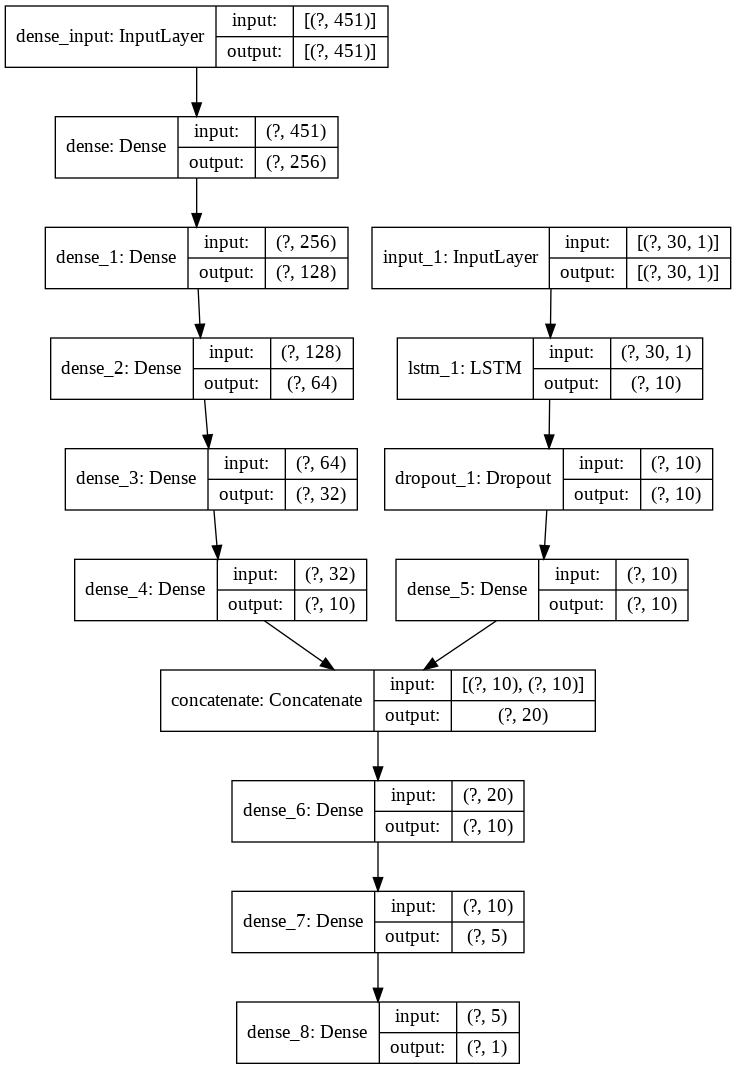

In [30]:
# create the MLP and LSTM models
mlp = create_mlp(X_train_num.shape[1], regress=False)
lstm = create_lstm((X_train_emb.shape[1]))
#print(mlp.output, lstm.output)

combinedInput = concatenate([mlp.output, lstm.output])
#combinedInput = tf.expand_dims(combinedInput,-1)

# our final FC layer head will have two dense layers, the final one
# being our regression head
#x = LSTM(5)(combinedInput)
x = Dense(10, activation="linear")(combinedInput)
x = Dense(5, activation="linear")(x)
x = Dense(1, activation="linear")(x)

model = Model(inputs=[mlp.input, lstm.input], outputs=x)


opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)

from tensorflow.keras.utils import plot_model

plot_model(model, to_file = 'model_1.png', show_shapes = True, show_layer_names = True)
# train the model


In [31]:
print("[INFO] training model...")
model.fit(
	x=[X_train_num, X_train_emb], y=y_train,
	validation_data=([X_val_num, X_val_emb], y_val),
	epochs=200, batch_size=8,
  callbacks=[earlystopping,reduceLR])


[INFO] training model...
Epoch 1/200
4051/4051 [==============================] - 26s 7ms/step - loss: 78.0509 - val_loss: 75.1964
Epoch 2/200
4051/4051 [==============================] - 25s 6ms/step - loss: 75.3025 - val_loss: 75.2997
Epoch 3/200
4051/4051 [==============================] - 25s 6ms/step - loss: 75.3002 - val_loss: 75.4713
Epoch 4/200
4051/4051 [==============================] - 26s 6ms/step - loss: 75.3072 - val_loss: 75.1224
Epoch 5/200
4051/4051 [==============================] - 26s 6ms/step - loss: 75.3012 - val_loss: 75.3764
Epoch 6/200
4051/4051 [==============================] - 25s 6ms/step - loss: 75.3133 - val_loss: 75.3535
Epoch 7/200
4051/4051 [==============================] - 25s 6ms/step - loss: 75.3021 - val_loss: 75.1363
Epoch 8/200
4051/4051 [==============================] - 25s 6ms/step - loss: 75.2969 - val_loss: 75.3025
Epoch 9/200
4051/4051 [==============================] - 25s 6ms/step - loss: 75.3128 - val_loss: 75.2986
Epoch 10/200
4051/405

In [3]:
!pip install autokeras
!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1

     |████████████████████████████████| 122kB 6.5MB/s 
  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc1) to /tmp/pip-req-build-n0rb4nd3
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-n0rb4nd3
  Running command git checkout -q 0fb69434a132093518e0e53d40020145ae192629
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc1-cp36-none-any.whl size=85424 sha256=cb5f74be37c2932df116c4a4c501d79beb8251edfe5283e37b447c3b4ef5971d
  Stored in directory: /tmp/pip-ephem-wheel-cache-_dludzt9/wheels/af/c9/7c/6ea01f9753a5dd1484136b4cb7b33a0a7fba253e5c74ade5af
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=d6d23a4dd7640ad5a917d1b63423c7abfa7e7cb3981f00528204e5b74fb5f799
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [4]:
import autokeras as ak

In [5]:
reg = ak.StructuredDataRegressor(max_trials=10, overwrite=True)

In [49]:
reg.fit(
	x=x_train, y=y_train,
	validation_data=(x_val, y_val),
	epochs=2, batch_size=8,
  callbacks=[earlystopping,reduceLR])

Trial 3 Complete [00h 17m 21s]
val_loss: 584258963898368.0

Best val_loss So Far: nan
Total elapsed time: 00h 54m 38s

Search: Running Trial #4

Hyperparameter      |Value     |Best Value So Far   
structured_data_block_1/normalize|False     |False               
structured_data_block_1/dense_block_1/num_layers|2         |2                   
structured_data_block_1/dense_block_1/use_batchnorm|False     |False               
structured_data_block_1/dense_block_1/dropout|0         |0                   
structured_data_block_1/dense_block_1/units_0|32        |32                  
structured_data_block_1/dense_block_1/units_1|32        |32                  
regression_head_1/dropout|0         |0                   
optimizer           |adadelta  |adam                
learning_rate       |0.001     |0.001               

Epoch 1/2
4051/4051 [==============================] - 159s 39ms/step - loss: 231019672341596602368.0000 - mean_squared_error: 231019672341596602368.0000 - val_loss: 490967

KeyboardInterrupt: ignored